# DATA CLEANING 

In [1]:
#import libraries
import pandas as pd
import numpy as np

In [2]:
#load data
data = pd.read_csv("smart_phone.csv")
data

,index,name,price,number_of_comment,pin,brand,rear_cam,front_rear,weight,RAM,screen_size,comment
0,0,Điện thoại Vivo Y11 (3GB/32GB) - Hàng chính hãng,2550000,122,5.00,Vivo,13,8,190,3,6.35,hàng giá trị cao mà đến đưa 1 hộp đóng gói rồi...
1,0,Điện thoại Vivo Y11 (3GB/32GB) - Hàng chính hãng,2550000,122,5.00,Vivo,13,8,190,3,6.35,Tiki giao hàng rất nhanh đặt lúc 18h hôm trước...
2,0,Điện thoại Vivo Y11 (3GB/32GB) - Hàng chính hãng,2550000,122,5.00,Vivo,13,8,190,3,6.35,Sản phẩm giao đến tay mới nguyên hộp sử dụng đ...
3,0,Điện thoại Vivo Y11 (3GB/32GB) - Hàng chính hãng,2550000,122,5.00,Vivo,13,8,190,3,6.35,Sau khi xài thử 3 ngày thì cảm thấy dưới tầm g...
4,0,Điện thoại Vivo Y11 (3GB/32GB) - Hàng chính hãng,2550000,122,5.00,Vivo,13,8,190,3,6.35,Nhưng cho em hỏi nếu điện thoại em bị hỏng hay...
...,...,...,...,...,...,...,...,...,...,...,...,...
10842,129,Điện Thoại Infinix HOT S (X521) - Hàng Chính H...,2350000,3,3.00,Infinix,13,8,140,2,5.20,Theo TIKI xác nhận hàng nguyên seal chưa khui ...
10843,129,Điện Thoại Infinix HOT S (X521) - Hàng Chính H...,2350000,3,3.00,Infinix,13,8,140,2,5.20,sản phẩm mới nguyên như quảng cáo mình từng xà...
10844,129,Điện Thoại Infinix HOT S (X521) - Hàng Chính H...,2350000,3,3.00,Infinix,13,8,140,2,5.20,máy rất mỏng và nhỏ mình ko rành về đt nhưng m...
10845,130,Điện thoại Black shark 3 (8GB/128GB) - Hàng QU...,14490000,1,4.72,Black Shark,3,20,222,8,NaN,K đúng sản phẩm yêu cầu tiki liên hệ cho tôi


## Natural Language Processing


In [3]:
#Extract comment
review_predict = data['comment']

In [4]:
#Load available labeld data
sentiment = pd.read_csv('text.csv',index_col=[0])
sentiment

,text_lb,text
2,1.0,"Ấn tượng, tôi sẽ quay lại vào dịp nghỉ lần sau"
3,1.0,"Quá tuyệt vời , view đẹp , chủ nhà thân thiện ..."
6,1.0,"Phòng nghỉ đáng giá, tiện nghi cơ bản đầy đủ ^..."
7,1.0,Thuận tiện cho việc đi thăm thú cảnh quan.\nBạ...
10,1.0,Nhân viên thân thiện
...,...,...
6994,1.0,"Anh chủ rất là nhiệt tình và vui vẻ, phòng sạc..."
6995,1.0,"Vị trí đẹp, mặc dù chúng tôi là khách duy nhất..."
6996,-1.0,"Không có chỗ đỗ xe, phải gửi xe ở ngoài rất tố..."
6997,1.0,"Gửi quản lý cấp cao của khách sạn, Rất tiếc hì..."


In [5]:
#load stopwords to array
with open('vietnamese_stopwords.txt', encoding="utf8") as f:
    stopwords = []
    for line in f:
        stopwords.append("_".join(line.strip().split()))

In [6]:
#cleaning review with re and ViTokenizer
import re
from pyvi import ViTokenizer
def preprocessor(text):
    corpus = []
    for i in range(0, len(text)):
        review = re.sub(r"http\S+", "", str(text[i]))
        review = re.sub(r"#\S+", "", review)
        review = re.sub(r"@\S+", "", review)
        review = re.sub('[_]',' ',review)
        review = re.sub('[^a-zA-Z_áàạảãăắằặẵẳâấầẩậẫđíỉìịĩóòỏọõôốồổộỗơớờởợỡéèẹẽẻêếềểệễúùủũụưứừửựữýỳỷỹỵÁÀẢÃẠĂẮẰẲẲẶẴÂẤẦẬẪẨĐÍÌỈỊĨÓÒỎỌÕÔỐỒỔỘỖƠỚỜỞỢỠÉÈẺẸẼÊẾỀỆỂỄÚÙỦŨỤƯỨỪỬỰỮÝỲỶỴỸ]',
                        ' ',review)
        review = ViTokenizer.tokenize(review)
        review = review.lower()
        review = review.split()
        review = [word for word in review if not word in  set(stopwords)]
        review = ' '.join(review)
        corpus.append(review)
    return corpus

In [7]:
#apply preprocessing function
X = sentiment['text'].values
corpus = preprocessor(X)

In [8]:
#Use TfidfVectorizer to transform reviews
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(analyzer='word', max_features=30000)
tfidf_vect.fit(corpus) 
X_data_tfidf =  tfidf_vect.transform(corpus)
#Split the data
from sklearn.model_selection import train_test_split
X = X_data_tfidf
y = sentiment['text_lb'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=102)
#Apply first model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
#First model accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
predictions = clf.predict(X_test)
print('accuracy:',accuracy_score(y_test,predictions))

accuracy: 0.8759615384615385


In [10]:
#Apply 2nd model and calculate accuracy, confusion matrix
from sklearn import svm
classifier = svm.SVC(probability=True)
classifier.fit(X_train, y_train)
train_predictions = classifier.predict(X_train)
predictions = classifier.predict(X_test)
print('accuracy:',accuracy_score(y_test,predictions))
print('confusion matrix:\n',confusion_matrix(y_test,predictions))
print('classification report:\n',classification_report(y_test,predictions))

accuracy: 0.885576923076923
confusion matrix:
 [[ 84 100]
 [ 19 837]]
classification report:
               precision    recall  f1-score   support

        -1.0       0.82      0.46      0.59       184
         1.0       0.89      0.98      0.93       856

    accuracy                           0.89      1040
   macro avg       0.85      0.72      0.76      1040
weighted avg       0.88      0.89      0.87      1040



In [11]:
#fit reviews to predict
X_1 = review_predict.values
corpus1 = preprocessor(X_1)
X_data_tfidf_1 =  tfidf_vect.transform(corpus1)

In [12]:
#extract prediction probability
proba = classifier.predict_proba(X_data_tfidf_1)

In [13]:
df1 = pd.DataFrame(data=proba, columns=['Negative', 'Positive'])

In [14]:
#add to data
data = pd.concat([data, df1], axis = 1).drop(columns = ['comment'])
data

,index,name,price,number_of_comment,pin,brand,rear_cam,front_rear,weight,RAM,screen_size,Negative,Positive
0,0,Điện thoại Vivo Y11 (3GB/32GB) - Hàng chính hãng,2550000,122,5.00,Vivo,13,8,190,3,6.35,0.164392,0.835608
1,0,Điện thoại Vivo Y11 (3GB/32GB) - Hàng chính hãng,2550000,122,5.00,Vivo,13,8,190,3,6.35,0.427146,0.572854
2,0,Điện thoại Vivo Y11 (3GB/32GB) - Hàng chính hãng,2550000,122,5.00,Vivo,13,8,190,3,6.35,0.299694,0.700306
3,0,Điện thoại Vivo Y11 (3GB/32GB) - Hàng chính hãng,2550000,122,5.00,Vivo,13,8,190,3,6.35,0.151726,0.848274
4,0,Điện thoại Vivo Y11 (3GB/32GB) - Hàng chính hãng,2550000,122,5.00,Vivo,13,8,190,3,6.35,0.583651,0.416349
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10842,129,Điện Thoại Infinix HOT S (X521) - Hàng Chính H...,2350000,3,3.00,Infinix,13,8,140,2,5.20,0.299585,0.700415
10843,129,Điện Thoại Infinix HOT S (X521) - Hàng Chính H...,2350000,3,3.00,Infinix,13,8,140,2,5.20,0.458235,0.541765
10844,129,Điện Thoại Infinix HOT S (X521) - Hàng Chính H...,2350000,3,3.00,Infinix,13,8,140,2,5.20,0.609718,0.390282
10845,130,Điện thoại Black shark 3 (8GB/128GB) - Hàng QU...,14490000,1,4.72,Black Shark,3,20,222,8,NaN,0.475681,0.524319


In [15]:
#group data based on index to calculate mean positive, negative and rank_point
group_data = data.groupby(['index', 'name', 'price', 'number_of_comment', 'pin', 'brand', 'rear_cam', 'front_rear', 'weight', 'RAM', 'screen_size'], as_index=False, dropna=False).mean()
group_data['rank_point'] = group_data.number_of_comment * group_data.Positive
group_data

,index,name,price,number_of_comment,pin,brand,rear_cam,front_rear,weight,RAM,screen_size,Negative,Positive,rank_point
0,0,Điện thoại Vivo Y11 (3GB/32GB) - Hàng chính hãng,2550000,122,5.00,Vivo,13,8,190,3,6.35,0.187012,0.812988,99.184532
1,1,Điện Thoại Samsung Galaxy M31 (128GB/6GB) - Hà...,5190000,500,6.00,Samsung,64,32,191,6,6.40,0.224164,0.775836,387.918081
2,2,Điện Thoại iPhone 12 Pro Max (6GB/128GB) - Hàn...,32990000,212,NaN,Apple,12,12,228,NaN,6.70,0.212693,0.787307,166.909178
3,3,Điện Thoại iPhone 12 Pro Max (6GB/256GB) - Hàn...,34990000,236,NaN,Apple,12,12,228,NaN,6.70,0.202409,0.797591,188.231454
4,4,Điện Thoại Vivo Y30i (4GB/128GB) - Hàng Chính ...,2850000,113,5.00,Vivo,13,8,197,4,6.47,0.161056,0.838944,94.800667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,125,Điện thoại Oukitel WP2 chống nước chống va đập...,5790000,3,NaN,Oukitel,NaN,NaN,NaN,NaN,NaN,0.176450,0.823550,2.470650
117,127,Điện Thoại Bphone 3 - Hàng Chính Hãng,6990000,3,3.00,Bphone,8,12,160,3,6.00,0.183173,0.816827,2.450482
118,129,Điện Thoại Infinix HOT S (X521) - Hàng Chính H...,2350000,3,3.00,Infinix,13,8,140,2,5.20,0.455846,0.544154,1.632462
119,130,Điện thoại Black shark 3 (8GB/128GB) - Hàng QU...,14490000,1,4.72,Black Shark,3,20,222,8,NaN,0.475681,0.524319,0.524319


## Numeric data cleaning with KNN Imputer

In [28]:
#extract numeric data
rank_data = group_data.drop(columns=['index', 'name', 'brand', 'number_of_comment', 'Negative', 'Positive'])

In [17]:
#clean numeric data with regex to remove all the character
pd.set_option('display.max_rows', rank_data.shape[0]+1)
rank_data[lambda col :rank_data.columns] = rank_data[lambda col :rank_data.columns].replace(r'\D+', np.NaN, regex=True)
rank_data

,price,pin,rear_cam,front_rear,weight,RAM,screen_size,rank_point
0,2550000,5.000,13,8,190,3,6.35,99.184532
1,5190000,6.000,64,32,191,6,6.40,387.918081
2,32990000,NaN,12,12,228,NaN,6.70,166.909178
3,34990000,NaN,12,12,228,NaN,6.70,188.231454
4,2850000,5.000,13,8,197,4,6.47,94.800667
5,2890000,5.020,13,8,198,3,6.53,124.836675
6,16450000,NaN,12,12,194,4,6.10,307.365370
7,3390000,4.020,48,16,183,6,6.39,365.053953
8,3150000,5.000,12,8,197,3,6.40,402.923517
9,4390000,5.020,48,16,209,NaN,NaN,257.018709


In [18]:
#Using KNNImputer to fill all the Null value
from sklearn.impute import KNNImputer
data_imputed = rank_data.values
ix = [i for i in range(data_imputed.shape[1]) if i != len(rank_data.columns)]
X = data_imputed[:, ix]
imputer = KNNImputer(n_neighbors=len(rank_data.columns))
imputer.fit(X)
Xtrans = imputer.transform(X)
X.shape

(121, 8)

## EDA and Data Exploration with ranking model

In [19]:
#transform back to pandas Dataframe
rank_data = pd.DataFrame(Xtrans,index=rank_data.index, columns=rank_data.columns)
rank_data.describe()

,price,pin,rear_cam,front_rear,weight,RAM,screen_size,rank_point
count,1.210000e+02,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,8.858194e+06,3.873754,25.793388,13.424587,187.712810,4.491736,6.185517,67.369328
std,8.506023e+06,1.131293,22.610168,8.869048,41.702626,2.150202,0.549322,95.836884
min,6.490000e+05,0.300000,2.000000,2.000000,0.000000,1.000000,4.000000,0.438532
25%,2.990000e+06,3.300000,12.000000,8.000000,170.875000,3.000000,6.000000,6.775330
50%,5.490000e+06,4.000000,13.000000,12.000000,189.750000,4.000000,6.390000,28.028287
75%,1.249000e+07,4.750000,48.000000,16.000000,196.750000,6.000000,6.500000,89.598133
max,3.699000e+07,6.000000,108.000000,48.000000,500.000000,12.000000,8.000000,407.864126


pearson correlation heatmap



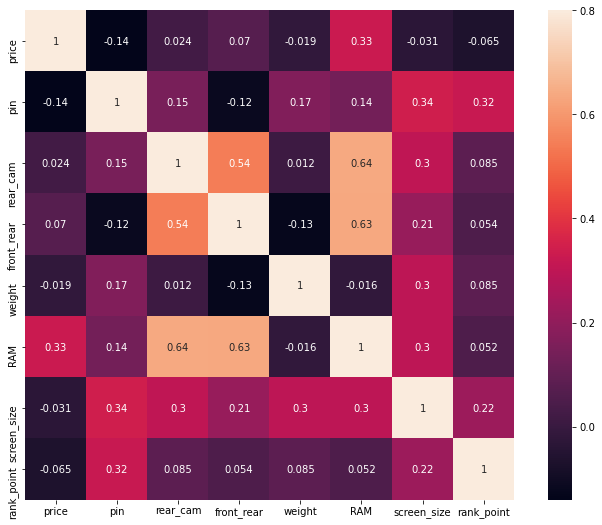

spearman correlation heatmap



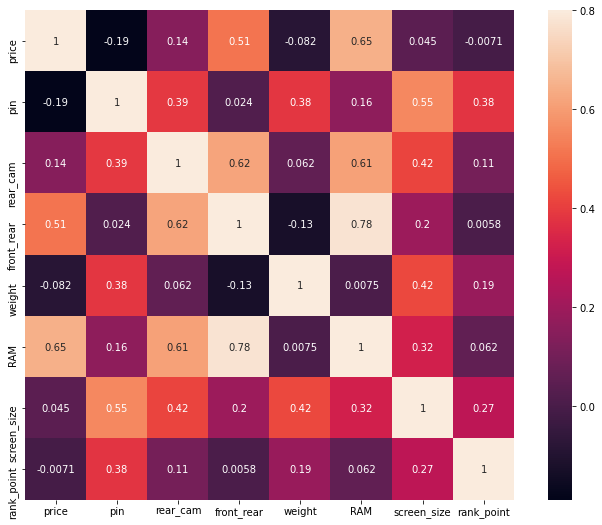

In [20]:
#Using seaborn and matplotlib to visualize correlation between fields
import seaborn as sns
import matplotlib.pyplot as plt
def print_heatmap(cor_method):
  corrmat = rank_data.corr(method=cor_method)
  print("{} correlation heatmap\n".format(cor_method))
  f, ax = plt.subplots(figsize=(12, 9))
  sns.heatmap(corrmat,annot= True, vmax=.8, square=True)
  plt.show()
print_heatmap('pearson')
print_heatmap('spearman')

In [21]:
#apply StandardScaler to rescaled data for weighting fields easily
from sklearn.preprocessing import StandardScaler

Standard_scaler = StandardScaler()
Xtrans = Standard_scaler.fit_transform(Xtrans)

In [22]:
rank_data_scaled = pd.DataFrame(Xtrans,index=rank_data.index, columns=rank_data.columns)

In [23]:
#From the corr shown above, we can extract weight of each fields for the ranking model
from skcriteria import Data, MIN, MAX
ranking = Data(
    rank_data_scaled,
    [MIN, MAX, MAX, MAX, MIN, MAX, MAX, MAX],
    cnames = rank_data.columns,
    weights = [0.1,1,1,1,0.1,0.1,1,100]
)

In [24]:
#Using simple ranking model to calculate rank
from skcriteria.madm import simple
dm = simple.WeightedSum(mnorm = "sum",wnorm = "sum")
dec = dm.decide(ranking)

In [25]:
rank_data['rank'] = dec.rank_
rank_data.sort_values(by=['rank'])

,price,pin,rear_cam,front_rear,weight,RAM,screen_size,rank_point,rank
11,3050000.0,5.000000,16.000,13.000,216.000,4.000,6.53000,407.864126,1
8,3150000.0,5.000000,12.000,8.000,197.000,3.000,6.40000,402.923517,2
1,5190000.0,6.000000,64.000,32.000,191.000,6.000,6.40000,387.918081,3
30,2290000.0,5.000000,13.000,8.000,192.000,2.000,6.50000,360.240135,4
7,3390000.0,4.020000,48.000,16.000,183.000,6.000,6.39000,365.053953,5
46,5990000.0,4.000000,48.000,32.000,172.000,6.000,6.50000,335.070539,6
6,16450000.0,3.831250,12.000,12.000,194.000,4.000,6.10000,307.365370,7
32,3790000.0,5.000000,48.000,13.000,217.000,6.000,6.50000,280.502733,8
9,4390000.0,5.020000,48.000,16.000,209.000,5.625,6.47125,257.018709,9
13,2430000.0,5.000000,12.000,5.000,195.000,3.000,6.50000,223.814045,10


In [26]:
cols_to_keep = ['index', 'name', 'brand', 'number_of_comment', 'Negative', 'Positive']
group_data = group_data.drop(group_data.columns.difference(cols_to_keep), axis=1)

In [27]:
#write to csv file
pd.concat([group_data, rank_data], axis=1, join="inner").to_csv('smart_phone_done.csv')